In [ ]:
import pandas as pd

# load the data
file_path =  r'C:\Users\SUDE\Downloads\Question1Analysis.xlsx' 
# convert the 'date' column to datetime format 
df = pd.read_excel(file_path, parse_dates=["date"])

# Check first rows of data
print(df.head())



        date platform   channel  new_installs    ad_cost  revenue
0 2023-01-01      iOS    Social           119  41.600629       53
1 2023-01-01      iOS    Search           132  52.994548       76
2 2023-01-01      iOS     Email            85  30.381195       50
3 2023-01-01      iOS  Referral            93   0.000000       43
4 2023-01-01  Android    Social           132  50.324698       34


ARPU per platform:
              ARPU
platform          
Android   0.280930
iOS       0.532965

 platform with higher ARPU: iOS



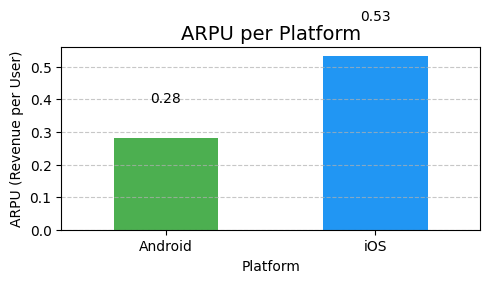

In [ ]:
#PART 1: DERIVED METRICS
# Calculate ARPU (Average Revenue Per User) per platform
# APRU = total revenue / total installs 

platform_metrics = df.groupby("platform").agg({
    "revenue": "sum",
    "new_installs": "sum"
})
platform_metrics["ARPU"] = platform_metrics["revenue"] / platform_metrics["new_installs"]

# print ARPU results
print("ARPU per platform:")
print(platform_metrics[["ARPU"]])
print("\n platform with higher ARPU:", platform_metrics["ARPU"].idxmax())
print()
import matplotlib.pyplot as plt

# Plot ARPU per platform
plt.figure(figsize=(5, 3))
platform_metrics["ARPU"].plot(kind='bar', color=['#4CAF50', '#2196F3'])

plt.title("ARPU per Platform", fontsize=14)
plt.ylabel("ARPU (Revenue per User)")
plt.xlabel("Platform")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for idx, value in enumerate(platform_metrics["ARPU"]):
    plt.text(idx, value + 0.1, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [14]:
# Calculate ROI (Return on Investment) and CAC (Customer Acquisition Cost) per channel
# ROI = total revenue / total ad cost
# CAC = total ad cost / total installs
channel_metrics = df.groupby("channel").agg({
    "revenue": "sum",
    "ad_cost": "sum",
    "new_installs": "sum"
})
channel_metrics["ROI"] = channel_metrics["revenue"] / channel_metrics["ad_cost"]
channel_metrics["CAC"] = channel_metrics["ad_cost"] / channel_metrics["new_installs"]

# Print ROI and CAC results
print("ROI and CAC per channel:")
print(channel_metrics[["ROI", "CAC"]])
print("\nHighest ROI channel:", channel_metrics["ROI"].idxmax())
print("Lowest CAC channel:", channel_metrics["CAC"].idxmin())

ROI and CAC per channel:
               ROI       CAC
channel                     
Email     1.434134  0.274943
Referral       inf  0.000000
Search    1.530004  0.258907
Social    1.564426  0.253125

Highest ROI channel: Referral
Lowest CAC channel: Referral


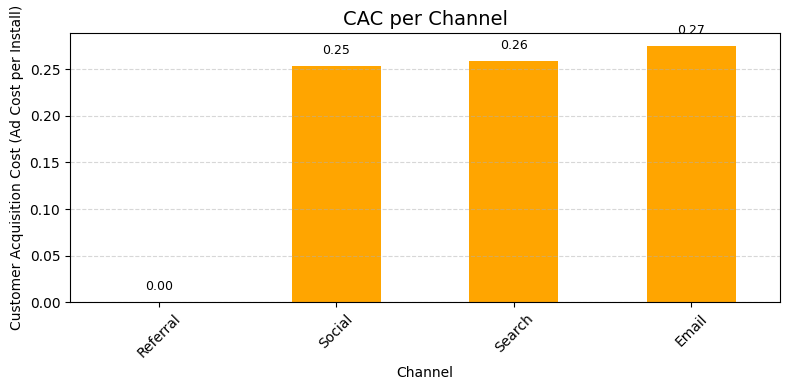

In [22]:
# Plot CAC per channel
plt.figure(figsize=(8, 4))
channel_metrics["CAC"].sort_values().plot(kind='bar', color='orange')

plt.title("CAC per Channel", fontsize=14)
plt.ylabel("Customer Acquisition Cost (Ad Cost per Install)")
plt.xlabel("Channel")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add values on top of bars
for idx, value in enumerate(channel_metrics["CAC"].sort_values()):
    plt.text(idx, value + 0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


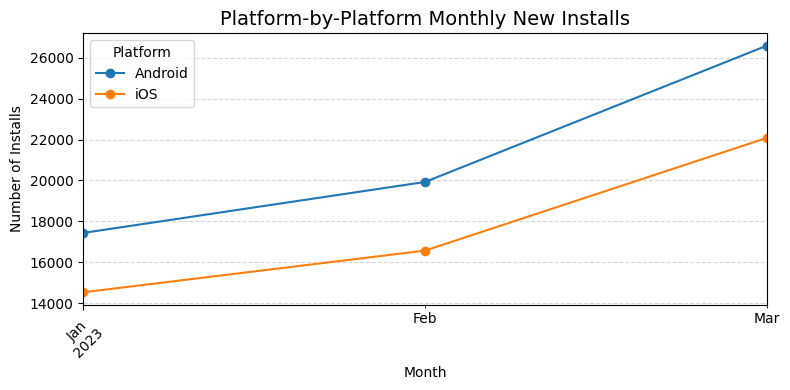

In [23]:
# PART 2: Time Series Trend

# Create a'month' column and ensure that the 'date' column is datetime.
df['month'] = df['date'].dt.to_period('M')  # Example: 2024-01

# Group by month and platform, sum installs
monthly_installs = df.groupby(['month', 'platform'])['new_installs'].sum().unstack()

# Plot the trend
monthly_installs.plot(marker='o', figsize=(8, 4))

plt.title("Platform-by-Platform Monthly New Installs", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Installs")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title="Platform")
plt.tight_layout()
plt.show()


Over the three-month period, both Android and iOS platforms experienced a steady increase in new installs. However, Android consistently outpaced iOS in volume, with the gap widening in March. This suggests that Android marketing strategies or market reach may be more effective during this period. While iOS also grew, its install base remained lower across all months. The acceleration in March may indicate the impact of a successful campaign or seasonal effect on user acquisition for both platforms.


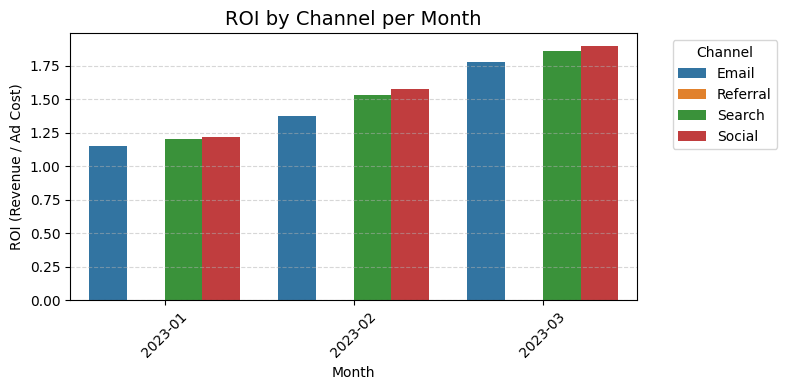

In [25]:
#PART 3: Visualization
#Plot the ROI by channel
import seaborn as sns

# Ensure 'month' column is present
df["month"] = df["date"].dt.to_period("M")

# Group by month and channel, aggregate revenue and ad_cost
roi_monthly = df.groupby(["month", "channel"]).agg({
    "revenue": "sum",
    "ad_cost": "sum"
}).reset_index()

# Calculate ROI for each group
roi_monthly["ROI"] = roi_monthly["revenue"] / roi_monthly["ad_cost"]

# Convert Period to string for better plotting
roi_monthly["month"] = roi_monthly["month"].astype(str)

# Plot grouped bar chart
plt.figure(figsize=(8, 4))
sns.barplot(data=roi_monthly, x="month", y="ROI", hue="channel")

plt.title("ROI by Channel per Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("ROI (Revenue / Ad Cost)")
plt.legend(title="Channel", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



PART 4: Interpretation

Over the three-month period, both iOS and Android platforms exhibited steady growth in user installs. But in terms of overall installs, Android constantly outperformed iOS, with a growing gap particularly apparent in March. However, our ARPU research showed that iOS users made more money per user, indicating that even while Android generates more volume, iOS users might be more valuable in terms of monetization.
Although they had relatively lower install volumes, the Email and Referral channels showed the highest return on investment (ROI) from a channel viewpoint, indicating that they are affordable but difficult to scale. Conversely, the ROI was lower for the Search and Social channels, which may have been caused by decreased conversion efficiency or higher ad expenses.In terms of acquisition cost, CAC values further shown that Referral was the most effective channel, while Search and other channels had greater acquisition costs and irregular returns.
The ROI grouped bar chart also revealed stability in high-ROI channels like Email and Referral, while some months showed volatility in ROI for Social and Search, suggesting campaign inconsistency or creative fatigue.

Based on these findings, the following recommendations can help improve user acquisition efficiency and monetization performance:
-Optimize cost-heavy channels (Search, Social): through A/B testing targeting, bidding, or creatives to increase ROI without compromising reach.

-Allocate a higher share of budget to iOS campaigns: when revenue per user is the priority

-Continue investing in Android: for rapid user growth, particularly offered lifetime value (LTV) and retention stay high.

-Double down on high-ROI channels (Email, Referral): by trying out different scaling techniques, but keep monitoring out for diminishing returns.

-Track conversion rates via channel over time to detect underperformance early and modify spending.
